# <span style="color:#54B1FF">Machine Learning Regression:</span> &nbsp; <span style="color:#1B3EA9"><b>Support Vector Machine (SVM)</b></span>

<br>

This notebook replicates the 1D (one-feature) and 2D (two-feature) regression examples from the previous notebook, but using a different regression algorithm called a [Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine). SVM algorithms are very powerful, and support a wide variety of classification and regression problems. We will use **sklearn**'s suppport vector regression (SVR) in this notebook, but note that a [wide variety of other SVM algorithms](https://scikit-learn.org/stable/modules/svm.html#regression) are available in **sklearn**.

Let's import the packages we'll need for this notebook.

<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm


<br>
<br>

___

## One-feature regression problem

Let's replicate the 1D (one-feature) dataset from the previous notebook, and then fit the data using support vector regression (SVR):

<br>

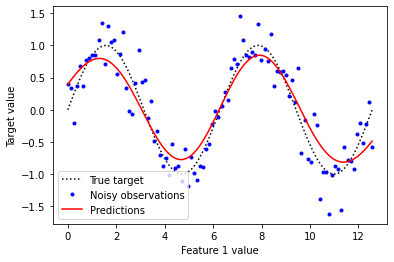

In [2]:

# create a "true" process  (this is what regression will try to predict)
n  = 100
x  = np.linspace(0, 4*np.pi, n)     # feature values
y0 = np.sin(x)                      # "true" target values


# create a noisy dataset  (based on the true process)
np.random.seed(10)
y  = np.sin(x) + 0.3 * np.random.randn(n)  # target values (with noise)


# fit an SVM regressor
X    = np.array([x]).T
svr  = svm.SVR()
svr.fit(X, y)


# predict the target values:
xi   = np.linspace(0, 4*np.pi, 500) # feature values for prediction
Xi   = np.array([xi]).T
yi   = svr.predict(Xi)              # predicted target values


# plot the true and noisy datasets
plt.figure()
ax = plt.axes()
ax.plot(x, y0, 'k:', label='True target')
ax.plot(x, y, 'b.', label='Noisy observations')
ax.plot(xi, yi, 'r-', label='Predictions')
ax.set_xlabel('Feature 1 value')
ax.set_ylabel('Target value')
ax.legend()
plt.show()



<br>
<br>

We can see that the default SVR algorithm has done an excellent job at predicting the true target values.

Let's check a few optional SVR parameters that can be used to change the nature of the predictions.

<br>
<br>

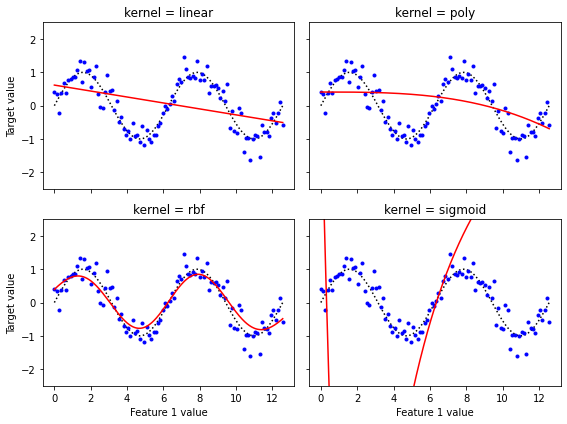

In [3]:

kernels  = ['linear', 'poly', 'rbf', 'sigmoid']


fig,AX   = plt.subplots(2, 2, figsize=(8,6))
axs      = AX.flatten()

for ax,k in zip(axs,kernels):
    X    = np.array([x]).T
    svr  = svm.SVR( kernel=k )
    svr.fit(X, y)
    yi   = svr.predict(Xi)              # predicted target values

    ax.plot(x, y0, 'k:', label='True target')
    ax.plot(x, y, 'b.', label='Noisy observations')
    ax.plot(xi, yi, 'r-', label='Predictions')
    
    ax.set_title( f'kernel = {k}' )

 
[ax.set_xlabel('Feature 1 value')  for ax in AX[1]]
[ax.set_ylabel('Target value')  for ax in AX[:,0]]
plt.setp(AX, ylim=(-2.5, 2.5))
plt.setp( AX[0], xticklabels=[])
plt.setp( AX[:,1], yticklabels=[])
plt.tight_layout()
plt.show()



<br>
<br>

We can see that the `kernel` type substantially affects the results. For this dataset, the "rbf" option is clearly the best, but a different kernel type might be preferable in a different regression problem.

The SVR algorithm has many other parameters that can be adjusted, as detailed in the [sklearn.svm.SVR  documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).  You may want to try adjusting other parameters, and considering their effects, when applying SVR to other datasets.
<br>
<br>

<br>
<br>

___

## Two-feature regression problem

Let's first replicate the 2D (two-feature) dataset from the previous notebook:

<br>

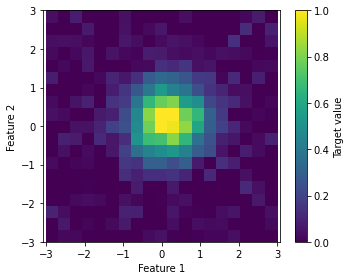

In [4]:

n       = 20
xmin    = -3
xmax    = 3


f0      = np.linspace(xmin, xmax, n)    # feature 1 values
f1      = np.linspace(xmin, xmax, n)    # feature 2 values


# create 2D feature space arrays:
# i.e., use np.meshgrid to generate all pairs of (f0,f1) values 
X0,X1   = np.meshgrid( f0 , f1 )
Ytrue   = np.exp( -(X0**2 + X1**2) )   # a 2D Gaussian function
Y       = Ytrue + 0.05 * np.random.randn(n, n)   # added noise


# plot:
plt.figure( figsize=(5,4) )
ax    = plt.axes()
pc    = ax.pcolor( X0, X1, Y, vmin=0, vmax=1 )  # vmin and vmax set the color limits
cb    = plt.colorbar( pc )
cb.set_label('Target value')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.axis('equal')
plt.tight_layout()
plt.show()


<br>
<br>

Next let's fit the data using support vector regression (SVR):

<br>
<br>

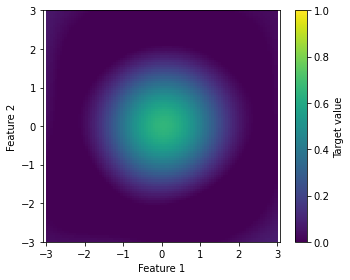

In [5]:


# construct feature values for prediction:
ni      = 100
f0i     = np.linspace(xmin, xmax, ni)    # feature 1 values  (for prediction)
f1i     = np.linspace(xmin, xmax, ni)    # feature 2 values  (for prediction)
X0i,X1i = np.meshgrid( f0i , f1i )       # 2D feature space  (for prediction)


# flatten the 2D feature space arrays into vectors:
x0,x1   = X0.flatten(), X1.flatten()     # 2D feature arrays flattened into vectors
x0i,x1i = X0i.flatten(), X1i.flatten()   # 2D feature arrays (for prediction) flattened into vectors
y       = Y.flatten()                    # 2D noisy target values flattened into vectors


# assemble feature matrices for machine learning:
X       = np.vstack([x0,x1]).T           # feature matrix (containing 2 columns, one per feature)
Xi      = np.vstack([x0i,x1i]).T         # feature matrix (for prediction)


# conduct machine learning regression
svr     = svm.SVR()
svr.fit(X, y)
yi      = svr.predict(Xi)                 # predicted target values
Yi      = yi.reshape( (ni,ni) )           # reshaped into a 2D feature space array


# plot:
plt.figure( figsize=(5,4) )
ax    = plt.axes()
pc    = ax.pcolor( X0i, X1i, Yi, vmin=0, vmax=1 )  # vmin and vmax set the color limits
cb    = plt.colorbar( pc )
cb.set_label('Target value')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.axis('equal')
plt.tight_layout()
plt.show()


<br>
<br>

Excellent!  The default SVR algorithm has produced an excellent fit, albeit with slightly reduced target values; the maximum target value should be 1, but the SVR algorithm has predicted lower target values. We can visualize this more clearly by considering a histogram of the predicted target values:

<br>

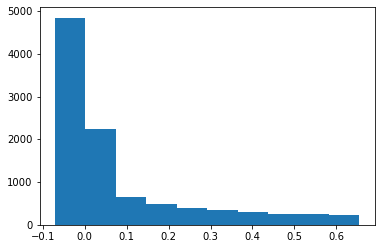

In [6]:

plt.figure()
plt.hist( yi )
plt.show()


<br>
<br>

How can we improve the predictions?  By balancing different algorithm parameters. This parameter balancing work is left for you, the reader, to try on your own.

Hints:

* Refer to the [SVR documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) and try changing the parameters you think are most relevant to this problem.
* Try the `gamma` parameter!
* Remember that parameter tweaking like this will always represent a balance between: (a) noise influence, and (b) fitted surface detail.

___
<a name="summary"></a>
# Summary
[Back to Table of Contents](#toc)

* Machine learning regression algorithms are appropriate when the **target value** is continuous.
* Classification and clustering are appropriate when the **target value** is categorical.
* In **sklearn**, the Python code for classification, clustering and regression is nearly identical;  all you need to do is change the algorithm type;  this makes it very convenient to test and try a wide variety of algorithms.
* We have considered a variety of machine learning algorithms in this open book including:
    * Artificial neural networks (ANN)
    * K-Nearest Neighbors (KNN)
    * K-Menas
    * Support vector machines (SVM)
* However, these represent just a small subset of available machine learning algorithms.
* Additionally, we have considered only the basics of what these algorithms are able to achieve.
* For more information regarding these and a wide variety of other machine learning algorithms, refer to the [sklearn documentation](https://scikit-learn.org/stable/index.html).


<br>
<br>

We have not yet considered two potentially very important data processing steps:

* Preprocessing
* Dimensionality reduction

These data processing steps are not essential for understanding machine learning algorithms like SVM, but they can be extremely important when analyzing real datasets.

The final two chapters of this open book consider these processing steps.